# Problem Statement

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. 

# Case:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Data Preparation:

 - You can observe in the dataset that some of the variables like <b>'weathersit'</b> and <b>'season'</b> have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
 - You might notice the column <b>'yr'</b> with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

**Model Building:**
In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable

**Model Evaluation:**
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

from sklearn.metrics import r2_score r2_score(y_test, y_pred)

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.

Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.



**Dataset characteristics**

day.csv have the following fields:

**instant:** record index

**dteday :** date

**season :** season (1:spring, 2:summer, 3:fall, 4:winter)

**yr :** year (0: 2018, 1:2019)

**mnth :** month ( 1 to 12)

**holiday :** weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

**weekday :** day of the week

**workingday :** if day is neither weekend nor holiday is 1, otherwise is 0.

**weathersit :**
1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp :** temperature in Celsius

**atemp:** feeling temperature in Celsius

**hum:** humidity

**windspeed:** wind speed

**casual:** count of casual users

**registered:** count of registered users

**cnt:** count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# STEP1-Reading & Understanding Data

In [2]:
bike=pd.read_csv("C:\\Users\\DELL\\Downloads\\day.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Checking for Null / Duplicate values

In [7]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

# STEP2  DATA CLEANING

# Removing redundant & unwanted columns

Based on given data and the data dictionary, the following variables can be removed for further analysis

1 **instant** : Its has only index value

2 **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence its not important for our    analysis

3 **casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns,we have created a new variable to find the ratio of these customer types.

In [8]:
Drop_col=['instant','dteday','casual','registered']
bike.drop(labels=Drop_col,axis=1,inplace=True)


In [9]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
bike.shape

(730, 12)

# STEP3 DATA VISUALISATION

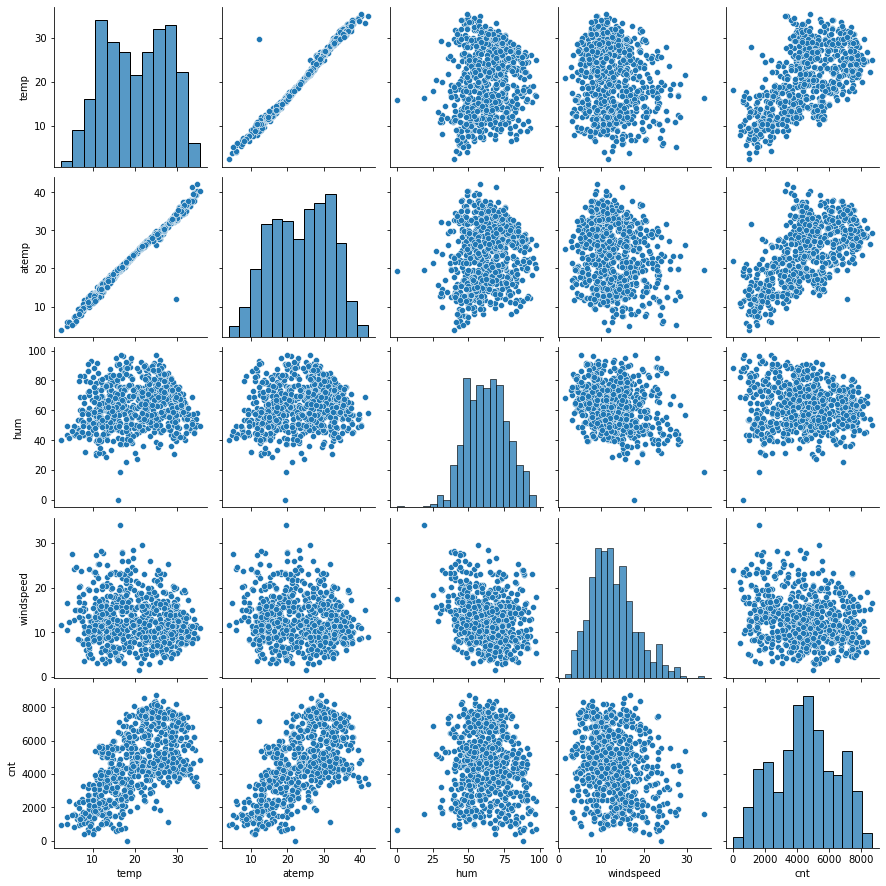

In [11]:
sns.pairplot(bike , vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

By analysing all the plots above, we can see that there are some independent variables look positively correlated to the 'cnt' variable.

**Continous Variables**

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


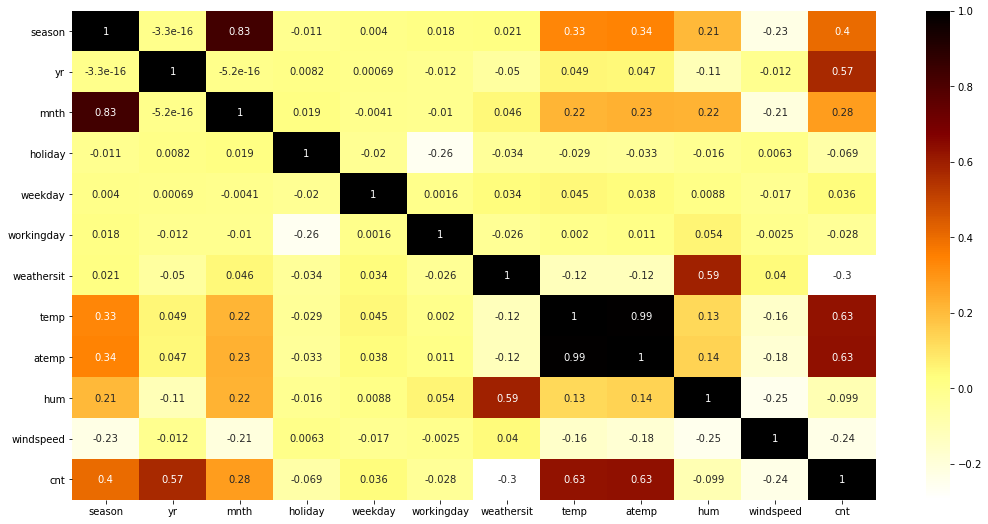

In [12]:
print(bike.columns)
corr = bike.corr()
plt.figure(figsize = (18,9))

g = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True, cmap="afmhot_r")

plt.show()

# STEP4 Dummyfying some columns

**categorical Variables:**
Encoding Categorical columns-Converting season, mnth,weathersit and weekday to categorical columns

**season:** converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter

**mnth:** converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec

**weathersit:** converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow

**weekday:** converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [13]:
bike.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bike.shape

(730, 12)

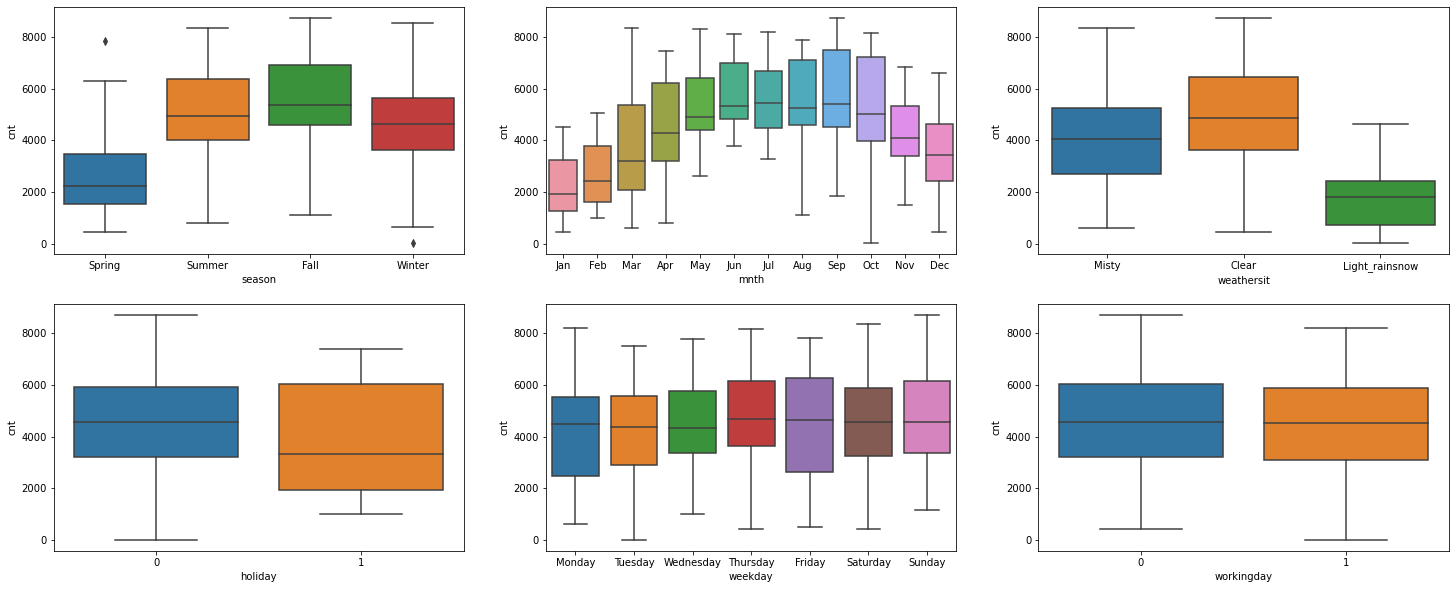

In [16]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

The plots above shows the relationship between categorical variables and a Target variable.

Bike Rentals are more during the Fall season and then in summer

Bike Rentals are more in partly cloudy weather

Bike Rentals are more on Friday,Saturday & Sunday

# STEP5 DATA PREPARATION

In [17]:
# Making a list of 'object' or 'category' columns to create dummy variables
categorical_cols = ['mnth', 'season', 'weekday' , 'weathersit']


In [18]:
#Get the dummy variables for the categorical colns & store in dummies_df dataframe
dummies_bike_df= pd.get_dummies(bike[categorical_cols] , drop_first = True )

In [19]:
# Concat the dummies_bike_df & bike
bike = pd.concat([bike,dummies_bike_df] , axis = 1)

In [20]:
bike.shape

(730, 34)

In [21]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rainsnow,weathersit_Misty
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Drop the lis tof categorical columns for which the dummies are created
bike.drop(['season', 'mnth' , 'weekday' , 'weathersit'] , axis=1 , inplace = True)

In [23]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rainsnow,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
bike.shape

(730, 30)

**Divide the data to train & test**

In [25]:
bike_train,bike_test=train_test_split(bike,train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


**Performing Scaling**

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale

Two typees of Scaling:
    
    1)Minmaxscaler
    
    2)Standardisation

In [26]:

scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed' , 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [28]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rainsnow,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,1,0,0,0,0,1


In [29]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rainsnow,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.247059,0.247059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.431725,0.431725,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


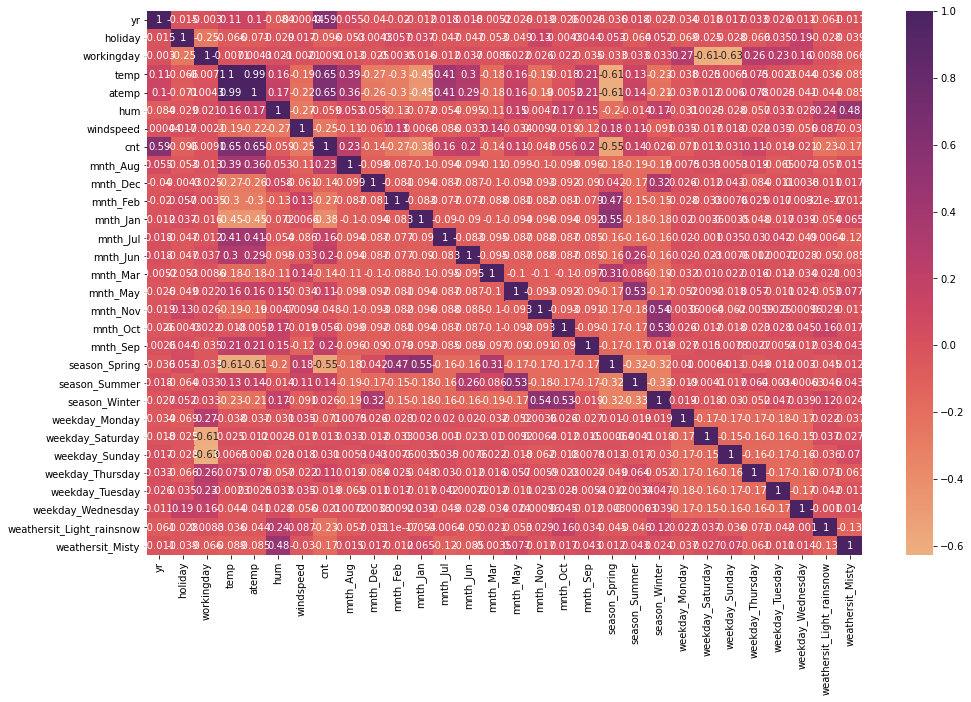

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="flare")
plt.show()

**Inference:**
There is multi-colinearity between the variables. We need to consider the factors when developing the model.

temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables

workingday variable has high negative correlation with Sat & Sun (where workingday =0)

Spring is negatively correlated with cnt

emp, atemp and yr has strong correlation with cnt

misty weather and humidity has correlation

various months and corresponding weather has correlation

In [31]:
##Dividing the data into X & Y
y_train = bike_train.pop('cnt')
X_train = bike_train

# STEP6 LINEAR REGRESSION MODEL

**RFE**

Recursive feature elimination

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 6),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light_rainsnow', True, 1),
 ('weathersit_Misty', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weathersit_Light_rainsnow', 'weathersit_Misty'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

**MODEL1**

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.15e-189
Time:                        18:35:16   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
10,season_Spring,4.37
12,season_Winter,4.06
11,season_Summer,2.82
14,weathersit_Misty,2.32
0,yr,2.09
8,mnth_Nov,1.85
6,mnth_Jan,1.75


**MODEL2**

**Removing the "hum" variable becuase of its low p-value and high VIF**

In [42]:
X_train_2=X_train_rfe.drop(['hum'],axis=1)

In [43]:
X_train_2.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weathersit_Light_rainsnow', 'weathersit_Misty'],
      dtype='object')

In [44]:
lm2 = sm.OLS(y_train,X_train_2).fit()   # Running the linear model

In [45]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.75e-186
Time:                        18:35:17   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [46]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
11,season_Winter,2.95
9,season_Spring,2.89
10,season_Summer,2.24
0,yr,2.07
7,mnth_Nov,1.81
5,mnth_Jan,1.66
6,mnth_Jul,1.59
13,weathersit_Misty,1.57


**MODEL3**

**Removing the "mnth_Nov" variable becuase of its high p-value and low VIF**

In [47]:
X_train_3=X_train_2.drop(['mnth_Nov'],axis=1)

In [48]:
lm3 = sm.OLS(y_train,X_train_3).fit()   # Running the linear model

In [49]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.74e-186
Time:                        18:35:17   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
8,season_Spring,2.89
9,season_Summer,2.24
0,yr,2.07
10,season_Winter,2.05
5,mnth_Jan,1.65
6,mnth_Jul,1.59
12,weathersit_Misty,1.57
7,mnth_Sep,1.34


**MODEL4**

**Removing the "mnth_Dec" variable becuase of its high p-value and low VIF**

In [51]:
X_train_4=X_train_3.drop(['mnth_Dec'],axis=1)

In [52]:
lm4 = sm.OLS(y_train,X_train_4).fit()   # Running the linear model

In [53]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.14e-187
Time:                        18:35:18   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [54]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
7,season_Spring,2.75
8,season_Summer,2.24
0,yr,2.07
9,season_Winter,1.78
4,mnth_Jan,1.61
5,mnth_Jul,1.59
11,weathersit_Misty,1.56
6,mnth_Sep,1.34


**MODEL5**

**Removing the "mnth_Jan" variable becuase of its high p-value and low VIF**

In [55]:
X_train_5=X_train_4.drop(['mnth_Jan'],axis=1)

In [56]:
lm5 = sm.OLS(y_train,X_train_5).fit()   # Running the linear model

In [57]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.06e-187
Time:                        18:35:18   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5.drop(['const'] , axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,season_Summer,2.23
6,season_Spring,2.08
0,yr,2.07
8,season_Winter,1.78
4,mnth_Jul,1.58
10,weathersit_Misty,1.55
5,mnth_Sep,1.34
9,weathersit_Light_rainsnow,1.08


Yes! Now we can see we have our model.

The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. 

The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

***Residual Analysis of the train data***

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
y_train_cnt = lm5.predict(X_train_5)


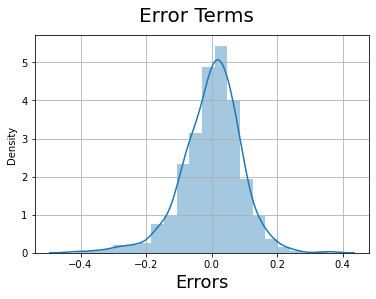

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 
plt.grid()
plt.show()

We can see Error terms are normally distributed.

# STEP7 MAKING PREDICTIONS

**Applying the scaling on the test sets**

In [61]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed' , 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

**Dividing into X_test and y_test**

In [62]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [63]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_5.drop(['const'] , axis = 1).columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [64]:
y_pred = lm5.predict(X_test_new)

**Model evaluation**

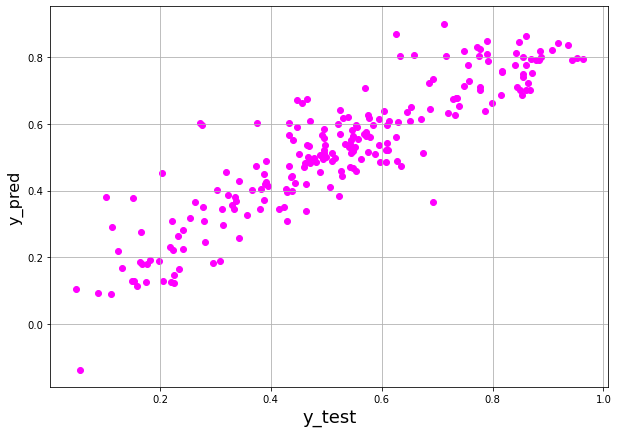

In [65]:
plt.figure(figsize = [10,7])
plt.scatter(y_test,y_pred , color = "magenta")
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

plt.grid()
plt.show()

In [66]:
from sklearn.metrics import r2_score 
r2=round(r2_score(y_test, y_pred),4)
r2

0.8053

**Adjusted R square**

In [67]:
# Next calculate adjusted R-squared using formula: Adj R^2 = (1−(1−R^2)∗(n−1)/(n−p−1))

n = X_test.shape[0]    # No. of rows of test data
p =X_test.shape[1]    # No. of columns of test data

adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7756

# STEP8 FINAL RESULTS

**From the train and test data set**

In [68]:
results = pd.DataFrame(index=["Train data","Test data"])
results["r_square"]=[0.835,0.805] 
results["Adjusted_r_square"]=[0.832,0.7756]
results

,r_square,Adjusted_r_square
Train data,0.835,0.8320
Test data,0.805,0.7756


In [69]:
lm5.params

const                        0.199434
yr                           0.233570
holiday                     -0.097463
temp                         0.490988
windspeed                   -0.147919
mnth_Jul                    -0.052057
mnth_Sep                     0.076846
season_Spring               -0.067169
season_Summer                0.046487
season_Winter                0.081741
weathersit_Light_rainsnow   -0.284199
weathersit_Misty            -0.080167
dtype: float64

**Equation for the Best Fit Line**

We can see that the equation of our best fitted line is:

<b>cnt</b> = <i>yr</i> x 0.234 + <i>holiday</i> x (-0.097) + <i>temp</i> x 0.491 + <i>windspeed</i> x (-0.148) 
            + <i>mnth_Jul</i> x (-0.052) + <i>mnth_Sep</i> x 0.077 + <i>season_Spring</i> x (-0.067) 
            + <i>season_Summer</i> x 0.046 + <i>season_Winter</i> x 0.082 + <i>weathersit_Light_rainsnow</i> x (-0.284) 
            + <i>weathersit_Misty</i> x (-0.080)

**Interpretation:**

1)We have a very decent model for the the demand for shared bikes with the significant variables.

2)We can see that temperature variable is having the highest coefficient 0.4909, which means if the temperature increases by one unit the number of bike rentals increases by 0.4909 units.

3)Similary we can see coefficients of other variables in the equation for best fitted line.

4)We can observe there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.